<a href="https://colab.research.google.com/github/Milayn/batik-classification/blob/main/batikClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#define the path and split data into training and validation split
dataset = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/drive/MyDrive/MILAY_SKRIPSI/batikNitik/data")
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/drive/MyDrive/MILAY_SKRIPSI/batikNitik/data",
        validation_split=0.2,
        subset="training",
        seed=123)
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/drive/MyDrive/MILAY_SKRIPSI/batikNitik/data",
        validation_split=0.2,
        subset="validation",
        seed=123)

Found 240 files belonging to 60 classes.
Found 240 files belonging to 60 classes.
Using 192 files for training.
Found 240 files belonging to 60 classes.
Using 48 files for validation.


In [5]:
# define the batch size and print the image labels
import tensorflow_datasets as tfds

batch_size = 64

dataset_name = dataset
class_names = dataset.class_names
print(class_names)

['10_sekar_ketongkeng', '11_brendhi', '12_cakar_ayam', '13_sekar_menur', '14_sekar_tebu', '15_sekar_manggis', '16_sekar_randhu', '17_worowari_rumpuk', '18_sekar_dhuku', '19_sekar_jagung', '1_sekar_kemuning', '20_jayakarina', '21_mawur', '22_sekar_tanjung', '23_sekar_keben', '24_sekar_srengenge', '25_sekar_soka', '26_sekar_nangka', '27_kawung_nitik', '28_sekar_kenthang', '29_sekar_pundhak', '2_sekar_liring', '30_sekar_delima', '31_krawitan', '32_cinde_wilis', '33_sekar_mlathi', '34_kuncup_kanthil', '35_sekar_dangan', '36_sekar_sawo', '37_manggar', '38_sekar_cengkeh', '39_sritaman', '3_sekar_duren', '40_sekar_mundhu', '41_sekar_andhong', '42_gedhangan', '43_sekar_pala', '44_klampok_arum', '45_sekar_jali', '46_sekar_lintang', '47_sekar_kenanga', '48_sekar_jeruk', '49_sekar_mindi', '4_sekar_gayam', '50_tanjung_gunung', '51_sekar_kenikir', '52_sekar_blimbing', '53_sekar_pijetan', '54_sari_mulat', '55_sekar_mrica', '56_sekar_kepel', '57_truntum_kurung', '58_jayakusuma', '59_rengganis', '5_se

In [6]:
#reseize your images and standardize data to make it for a neural network
size = (512, 512)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_val = ds_validation.map(lambda image, label: (tf.image.resize(image, size), label))

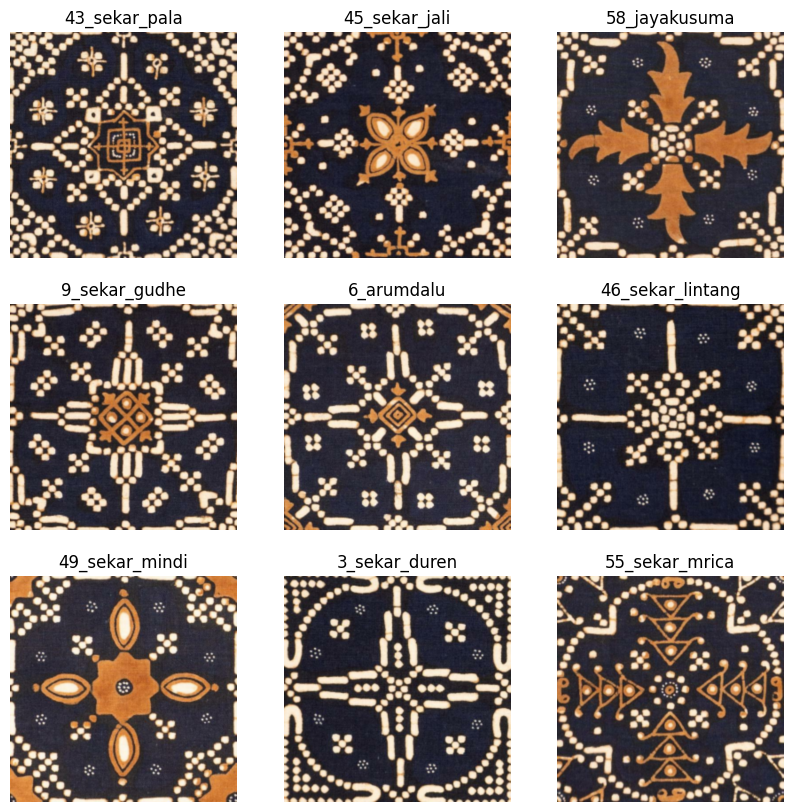

In [7]:
# display the first 9 images
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
#do futher preprocessing to increase the instances of images

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

image = Sequential (
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomRotation(45 / 360),  # Rotasi 45 derajat
        layers.RandomRotation(135 / 360),  # Rotasi 135 derajat
        layers.RandomZoom(height_factor = (-0.2, -0.3), width_factor=(-0.2, -0.3), interpolation='bilinear'), # zoom
        layers.RandomContrast(factor=0.1),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    ],
        name="image"
)

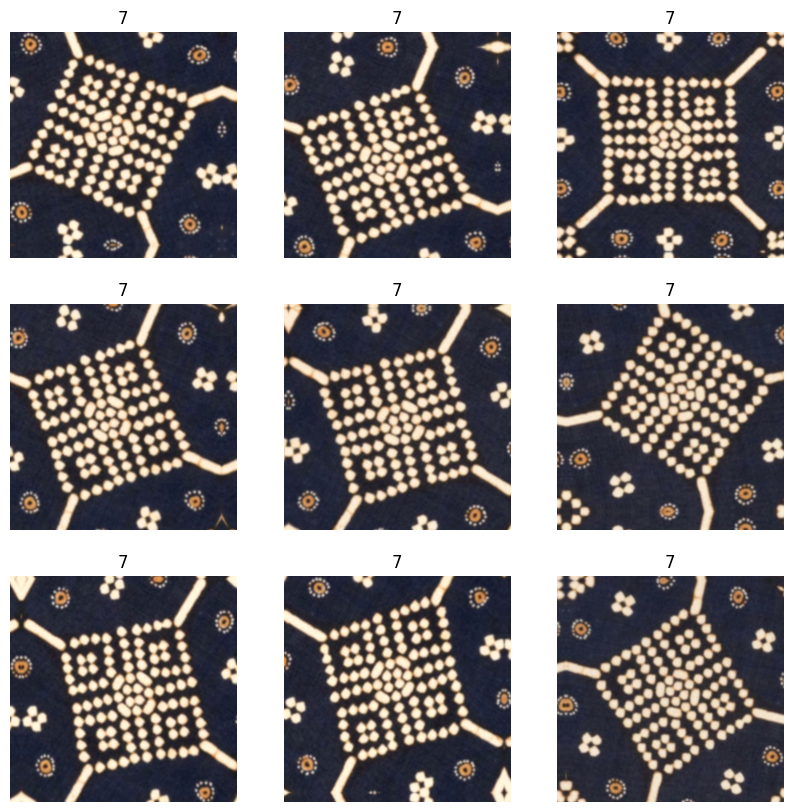

In [9]:
import numpy as np

for images, labels in ds_train.take(1):
  plt.figure(figsize=(10, 10))
  first_image = images[0]
  def f(x):
    return np.int64(x)
  f2 = np.vectorize(f)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = image(
        tf.expand_dims(first_image, 0), training=True
    )
    plt.imshow(augmented_image[0].numpy().astype("int32"))
    plt.title(f2(labels[0]))
    plt.axis("off")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Fungsi untuk membangun model
def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Mendefinisikan dataset pelatihan dan validasi (contoh)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_val, y_val) = mnist.load_data()
x_train, x_val = x_train / 255.0, x_val / 255.0

# Pemilihan kombinasi batch size dan jumlah epoch yang akan dievaluasi
batch_sizes = [16, 32, 64, 128]
num_epochs = [10, 20, 30, 40]

# Mengeksekusi eksperimen untuk setiap kombinasi
results = {}
for batch_size in batch_sizes:
    for num_epoch in num_epochs:
        print(f"Training with batch size {batch_size} and {num_epoch} epochs...")
        model = build_model()
        model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])

        # Melatih model dengan kombinasi yang dipilih
        history = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epoch, validation_data=(x_val, y_val), verbose=0)

        # Menyimpan hasil evaluasi
        results[(batch_size, num_epoch)] = history.history

# Analisis hasil
best_accuracy = 0
best_combination = None
for combination, history in results.items():
    val_accuracy = history['val_sparse_categorical_accuracy'][-1]
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_combination = combination

print(f"Best combination: batch size {best_combination[0]}, {best_combination[1]} epochs. Validation accuracy: {best_accuracy}")


11490434/11490434 [==============================] - 0s 0us/step
Training with batch size 16 and 10 epochs...
Training with batch size 16 and 20 epochs...
Training with batch size 16 and 30 epochs...


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Fungsi untuk membangun model
def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(60, activation='softmax')
    ])
    return model

# Mendefinisikan dataset menggunakan tf.keras.preprocessing.image_dataset_from_directory
mnist = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/MILAY_SKRIPSI/batikNitik/data",
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',  # Mengatur mode warna menjadi grayscale
    batch_size=32,
    image_size=(28, 28),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

# Pisahkan data validasi
mnist_val = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/MILAY_SKRIPSI/batikNitik/data",
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',  # Mengatur mode warna menjadi grayscale
    batch_size=32,
    image_size=(28, 28),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
)

# Preprocessing data
def preprocess_data(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Preprocess data train dan validation
mnist = mnist.map(preprocess_data)
mnist_val = mnist_val.map(preprocess_data)

# Pemilihan kombinasi batch size dan jumlah epoch yang akan dievaluasi
batch_sizes = [30, 32]
num_epochs = [100, 1000]

# Mengeksekusi eksperimen untuk setiap kombinasi
results = {}
for batch_size in batch_sizes:
    for num_epoch in num_epochs:
        print(f"Training with batch size {batch_size} and {num_epoch} epochs...")
        model = build_model()
        model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])

        # Melatih model dengan kombinasi yang dipilih
        history = model.fit(mnist, epochs=num_epoch, validation_data=mnist_val, verbose=0)

        # Menyimpan hasil evaluasi
        results[(batch_size, num_epoch)] = history.history

# Analisis hasil
best_accuracy = 0
best_combination = None
for combination, history in results.items():
    val_accuracy = history['val_sparse_categorical_accuracy'][-1]
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_combination = combination

print(f"Best combination: batch size {best_combination[0]}, {best_combination[1]} epochs. Validation accuracy: {best_accuracy}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Fungsi untuk membangun model
def build_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(60, activation='softmax')
    ])
    return model

# Mendefinisikan dataset menggunakan tf.keras.preprocessing.image_dataset_from_directory
mnist = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/MILAY_SKRIPSI/batikNitik/data",
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',  # Mengatur mode warna menjadi grayscale
    batch_size=32,
    image_size=(28, 28),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

# Pisahkan data validasi
mnist_val = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/MILAY_SKRIPSI/batikNitik/data",
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',  # Mengatur mode warna menjadi grayscale
    batch_size=32,
    image_size=(28, 28),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
)

# Preprocessing data
def preprocess_data(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Preprocess data train dan validation
mnist = mnist.map(preprocess_data)
mnist_val = mnist_val.map(preprocess_data)

# Pemilihan kombinasi batch size dan jumlah epoch yang akan dievaluasi
batch_sizes = [30, 32]
num_epochs = [100, 1000]

# Mengeksekusi eksperimen untuk setiap kombinasi
results = {}
for batch_size in batch_sizes:
    for num_epoch in num_epochs:
        print(f"Training with batch size {batch_size} and {num_epoch} epochs...")
        model = build_model()
        model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])

        # Melatih model dengan kombinasi yang dipilih
        history = model.fit(mnist, epochs=num_epoch, validation_data=mnist_val, verbose=0)

        # Menyimpan hasil evaluasi
        results[(batch_size, num_epoch)] = history.history

# Analisis hasil
best_accuracy = 0
best_combination = None
for combination, history in results.items():
    val_accuracy = history['val_sparse_categorical_accuracy'][-1]
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_combination = combination

    print(f"Batch size: {combination[0]}, Epochs: {combination[1]}")
    print("Validation Accuracy:", val_accuracy)

print(f"Best combination: batch size {best_combination[0]}, {best_combination[1]} epochs. Validation accuracy: {best_accuracy}")

 **CROSS VALIDATION RESNET**


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import numpy as np
from sklearn.model_selection import KFold

# Fungsi untuk membangun model
# def build_model():
#     model = Sequential([
#         Flatten(input_shape=(28, 28)),
#         Dense(128, activation='relu'),
#         Dense(60, activation='softmax')
#     ])
#     return model

# Fungsi
def build_resnet50_model():
    # Membuat base model ResNet50 tanpa lapisan Fully Connected terakhir
    base_model = ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=(52, 52, 3),
    )

    # Menghentikan layer-layer yang ada pada base model agar tidak ter-update selama pelatihan
    for layer in base_model.layers:
        layer.trainable = False

    # Membangun model dengan menambahkan lapisan kustom di atas base model
    x = base_model.output
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(60, activation='softmax')(x)

    # Membuat model gabungan
    model = Model(inputs=base_model.input, outputs=predictions)

    return model

# Membuat dataset menggunakan tf.keras.preprocessing.image_dataset_from_directory
mnist = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/MILAY_SKRIPSI/batikNitik/data",
    labels='inferred',
    label_mode='int',
    color_mode='rgb',  # Mengatur mode warna menjadi grayscale
    batch_size=32,
    image_size=(52, 52),
    shuffle=True,
    seed=123,
)

# Preprocessing data
def preprocess_data(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Preprocess data train
mnist = mnist.map(preprocess_data)

# Pemilihan kombinasi batch size dan jumlah epoch yang akan dievaluasi
batch_sizes = [30, 32]
num_epochs = [100, 1000]

# Inisialisasi k-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=123)

# Mengeksekusi eksperimen untuk setiap kombinasi
results = {}
for batch_size in batch_sizes:
    for num_epoch in num_epochs:
        print(f"Training with batch size {batch_size} and {num_epoch} epochs...")
        val_accuracies = []

        # Mengambil indeks dari dataset
        indices = np.arange(len(mnist))

        for train_index, val_index in kf.split(indices):
            # Mengambil data pelatihan dan validasi menggunakan indeks
            train_data = mnist.unbatch().filter(lambda x, i: tf.reduce_any(tf.equal(i, train_index))).batch(batch_size)
            val_data = mnist.unbatch().filter(lambda x, i: tf.reduce_any(tf.equal(i, val_index))).batch(batch_size)

            model = build_resnet50_model()
            model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=[SparseCategoricalAccuracy()])

            # Melatih model dengan kombinasi yang dipilih
            history = model.fit(train_data, epochs=num_epoch, verbose=0)

            # Evaluasi model pada data validasi
            # _, val_accuracy = model.evaluate(val_data, verbose=0)
            # val_accuracies.append(val_accuracy)

        # Menyimpan hasil evaluasi
        # results[(batch_size, num_epoch)] = np.mean(val_accuracies)
        results[(batch_size, num_epoch)] = history.history

# Analisis hasil
best_accuracy = 0
best_combination = None
for combination, val_accuracy in results.items():
    val_accuracy = history['val_sparse_categorical_accuracy'][-1]
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_combination = combination

    print(f"Batch size: {combination[0]}, Epochs: {combination[1]}")
    print("Average Validation Accuracy:", val_accuracy)

print(f"Best combination: batch size {best_combination[0]}, {best_combination[1]} epochs. Validation accuracy: {best_accuracy}")